In [25]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity,manhattan_distances
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from numpy import dot
from numpy.linalg import norm
from glob import glob
import re
from sklearn.metrics.pairwise import cosine_distances

In [3]:
class FeatureExtractor:
  def __init__(self):
    base_model = InceptionV3(weights='imagenet')
    # Customize the model to return features from fully-connected layer
    self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output) 
    # InceptionV3 : ['batch_normalization_93', 'activation_85', 'mixed9_1', 'concatenate_1', 'activation_93', 'mixed10', 'avg_pool', 'predictions'].

  def extract(self, img):
  # Resize the image
    img = img.resize((299,299)) 
    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # Extract Features
    feature = self.model.predict(x)[0]
    return feature  # feature / np.linalg.norm(feature)
  

In [4]:
fe = FeatureExtractor()

features = []
img_paths = []

In [6]:
# 파일명이 jacket, pants 이면 해당 카테고리만 추출
img_path = r"C:\Users\NT550009\Desktop\recommendation\pants.jpg"
img = Image.open(img_path) # 알고 싶은 이미지 경로

# query 에서 feature 추출
query = fe.extract(img) 


# 파일 이름 추출
query_category = re.search(r"([^\\\/]+)(\.[a-zA-Z]+)$", img_path).group(1) # pants 가 나와야 함

1/1 [==============================] - 1s 1s/step


In [7]:
print(query_category)

pants


In [8]:
# 동일 category 에 해당하는 상품만 가져오기
product_category = pd.read_csv(r"C:\Users\NT550009\Desktop\MUSINSA\data\category.csv", index_col=0)
product_category.head()

,Category,Subcategory,Item_code
0,T-shirt,반소매 티셔츠,996177
1,T-shirt,반소매 티셔츠,1382658
2,T-shirt,반소매 티셔츠,996178
3,T-shirt,반소매 티셔츠,1848166
4,T-shirt,반소매 티셔츠,2086653


In [9]:
# # "Category"가 "pants"인 데이터 추출
query_category_df = product_category[product_category['Category'] == query_category]
query_category_df.head()


,Category,Subcategory,Item_code
12600,pants,트레이닝/조거 팬츠,1551840
12601,pants,트레이닝/조거 팬츠,404949
12602,pants,트레이닝/조거 팬츠,2112059
12603,pants,트레이닝/조거 팬츠,999426
12604,pants,트레이닝/조거 팬츠,1736085


In [10]:
item_codes = query_category_df['Item_code'].tolist()
item_codes

[1551840,
 404949,
 2112059,
 999426,
 1736085,
 1100326,
 999449,
 1370101,
 1551839,
 1212776,
 1568057,
 1212777,
 1278214,
 2112061,
 1015777,
 1324127,
 1778385,
 573121,
 404950,
 1582583,
 947202,
 1844582,
 668527,
 658030,
 947201,
 883004,
 825757,
 620632,
 1324128,
 983196,
 999439,
 1826978,
 1568032,
 1736562,
 988718,
 2744549,
 1595607,
 1317598,
 962130,
 1278213,
 962116,
 2287458,
 1077204,
 1642811,
 1514260,
 184361,
 1844581,
 1333322,
 2081268,
 2562527,
 1539028,
 999414,
 1324410,
 668385,
 1292228,
 969069,
 2307746,
 988717,
 1333324,
 2392464,
 640820,
 1844583,
 1324411,
 1817961,
 1629081,
 936401,
 1533236,
 1250377,
 1753533,
 1269090,
 1830026,
 2058174,
 1629082,
 1269616,
 2287456,
 1642810,
 1582589,
 1804765,
 2569078,
 1730903,
 1778394,
 2392465,
 1736087,
 2713134,
 291498,
 724867,
 1250376,
 2723714,
 1985224,
 1564072,
 1805057,
 1736561,
 2132190,
 884125,
 647864,
 1985223,
 1272785,
 1079796,
 1627890,
 1769063,
 2081336,
 1736088,
 525575,

# 카테고리에 해당하는 feature

In [11]:
features_dir = r"C:\Users\NT550009\Desktop\features"
os.chdir(features_dir)
feature_list = os.listdir(features_dir)

# 원하는 조건을 만족하는 파일 목록 추출    
target_feature_files = []

for code in item_codes:
    for file in feature_list:
        if str(code) in file:
            target_feature_files.append(file)

In [12]:
print(target_feature_files)

['404949_0.npy', '573121_0.npy', '404950_0.npy', '668527_0.npy', '668527_1.npy', '668527_2.npy', '668527_3.npy', '668527_4.npy', '658030_0.npy', '658030_1.npy', '658030_2.npy', '658030_3.npy', '620632_0.npy', '620632_1.npy', '620632_2.npy', '620632_3.npy', '620632_4.npy', '620632_5.npy', '620632_6.npy', '620632_7.npy', '2744549_0.npy', '2744549_1.npy', '2744549_2.npy', '668385_0.npy', '668385_1.npy', '668385_2.npy', '668385_3.npy', '668385_4.npy', '640820_0.npy', '640820_1.npy', '640820_2.npy', '640820_3.npy', '640820_4.npy', '640820_5.npy', '640820_6.npy', '640820_7.npy', '291498_0.npy', '724867_0.npy', '724867_1.npy', '724867_2.npy', '724867_3.npy', '647864_0.npy', '647864_1.npy', '647864_2.npy', '647864_3.npy', '647864_4.npy', '525575_0.npy', '525575_1.npy', '525575_2.npy', '525575_3.npy', '525575_4.npy', '2789091_0.npy', '2789091_1.npy', '2789091_2.npy', '2789091_3.npy', '2789091_4.npy', '2789091_5.npy', '2789111_0.npy', '2789111_1.npy', '2789111_2.npy', '2789111_3.npy', '2789111_4

In [13]:
# 폴더에 저장되어 있는 features npy 가져오기

# 각 파일을 읽어서 features에 추가

for file_path in target_feature_files:
    features_dir = r"C:\Users\NT550009\Desktop\features/" 
    file = features_dir+ file_path
    data = np.load(file)
    features.append(data)

In [ ]:
print(type(features))
features[0]

# 카테고리에 해당하는 이미지 연결

In [15]:
# 이미지 파일 경로를 저장한 리스트 생성
img_paths = [r"C:\Users\NT550009\Desktop\detail_image_aggregated/" + file.replace('.npy', '.jpg') for file in target_feature_files]
print(img_paths)

['C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/404949_0.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/573121_0.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/404950_0.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/668527_0.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/668527_1.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/668527_2.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/668527_3.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/668527_4.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/658030_0.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/658030_1.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/658030_2.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/658030_3.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/620632_0.jpg', 'C:\\Users\\NT550009\\Desktop\\detail_image_aggregated/620632_1.jpg', 'C:\\Users\\NT55000

In [16]:
print(len(item_codes)) # category에 해당하는 item_code
print(len(img_paths)) # category에 해당하는 이미지
print(len(target_feature_files)) # category에 해당하는 feature

2700
1455
1455


# L2

In [17]:
# Calculate the similarity (distance) between images # 유사도 비교
dists = np.linalg.norm(features - query, axis=1) 

# Extract 30 images that have lowest distance 
# 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]
print("dists: ", dists)
print("ids :", ids)

dists:  [0.4930576  0.98388386 0.93901676 ... 0.5297798  1.0623262  1.0532867 ]
ids : [ 570  447  174  469  441  519  808  752 1001  827  795  855  354  686
  237  805  512  828  445   36  121 1088  816  172 1183  506  452 1000
  625  465]


In [ ]:
print(ids)

[ 570 2025 3480 3357 1902  447 1629 3084  174 3379 1924  469 1896  441
 3351  519 1974 3429 2263 3718  808  752 3662 2207 1001 2456 3911 3737
  827 2282]


# L2

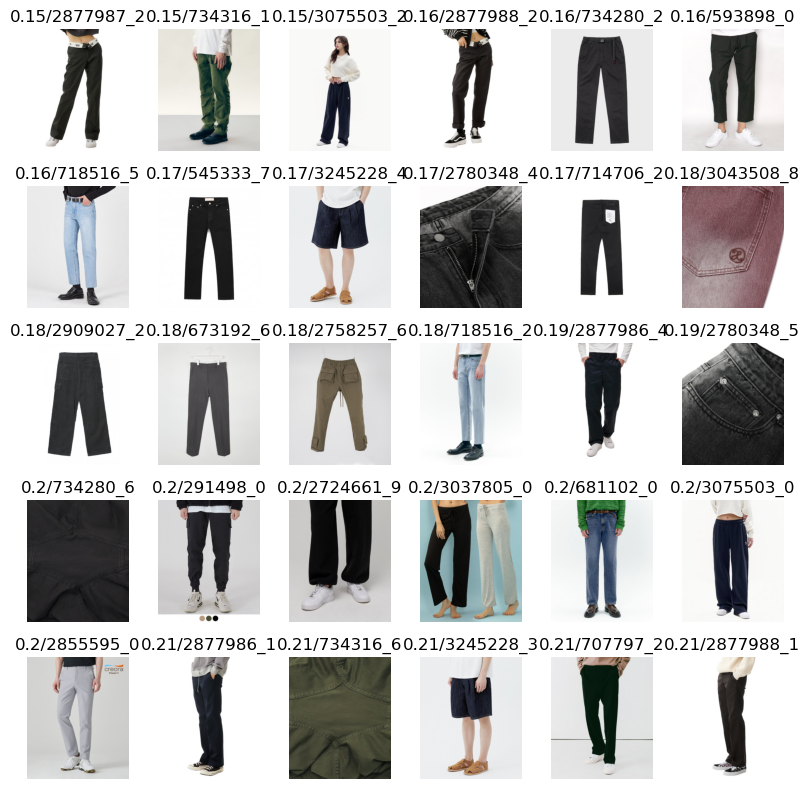

In [29]:
# Calculate the similarity (distance) between images # 유사도 비교
dists = np.linalg.norm(features - query, axis=1) 

ids = np.argsort(dists)[:30]

scores = [(dists[id], img_paths[id],  id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8)) # figsize 설정
for a in range(5*6): # 30개의 서브플롯
    score = scores[a] # 거리유사도가 낮은 순서대로 
    axes.append(fig.add_subplot(5, 6, a+1)) # 채워진 서브플롯 위치 저장
    
    string = score[1]
    pattern = r'[^/\\]+(?=\.[^.]+$)'
    match = re.search(pattern, string)
    if match:
        product_num = match.group()
      
    subplot_title=str(round(score[0],2)) + "/" + str(product_num)
    
    axes[-1].set_title(subplot_title) 
    plt.axis('off') # 현재 서브플롯의 축에 대한 눈금과 레이블을 제거
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

# 코사인

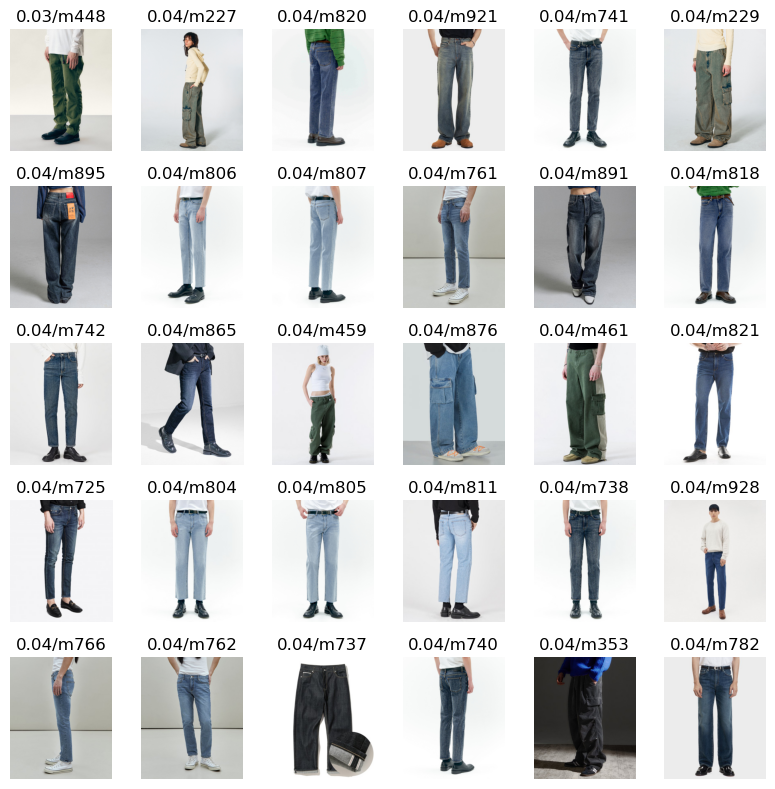

In [30]:
# cosine similarity
dists = cosine_distances(features, query.reshape(1, -1)).ravel()
# dists = np.linalg.norm(features - query, axis=1) 

# Extract 30 images that have lowest distance 
# 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]
 
scores = [(dists[id], img_paths[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

# Manhattan

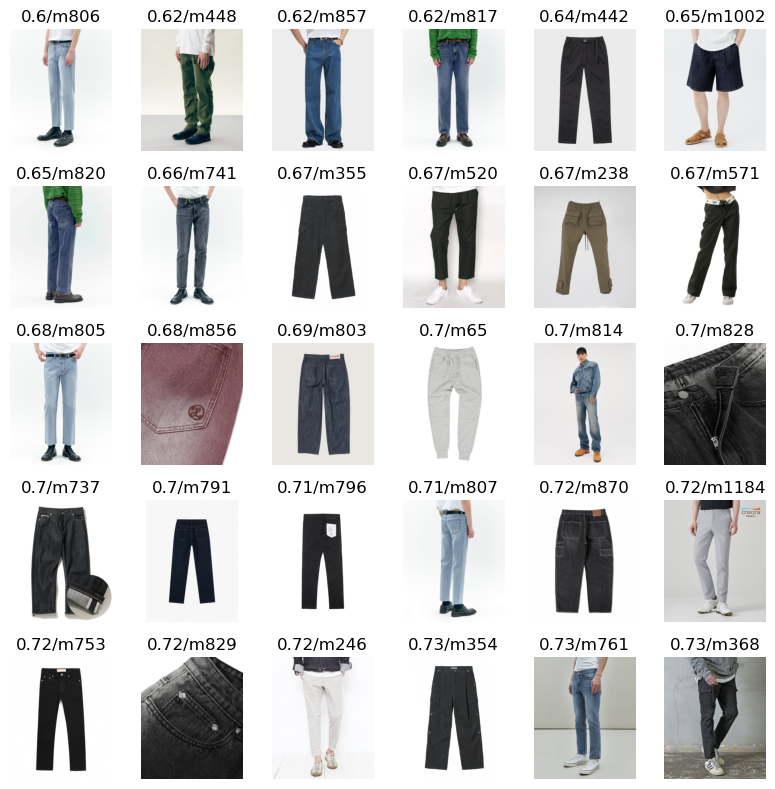

In [31]:
# Manhattan
distance = np.sum(np.abs(features - query))


dists = manhattan_distances(features, query.reshape(1, -1)).ravel()

dists = np.sum(np.abs(features - query), axis=1)

# Extract 30 images that have lowest distance 
# 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]


scores = [(dists[id], img_paths[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()